Accuracy: 65.38%

Classification Report:
                       precision    recall  f1-score   support

           ependymoma       0.69      0.82      0.75        11
         glioblastoma       0.25      0.25      0.25         4
      medulloblastoma       1.00      0.86      0.92         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.00      0.00      0.00         3

             accuracy                           0.65        26
            macro avg       0.59      0.59      0.58        26
         weighted avg       0.64      0.65      0.64        26



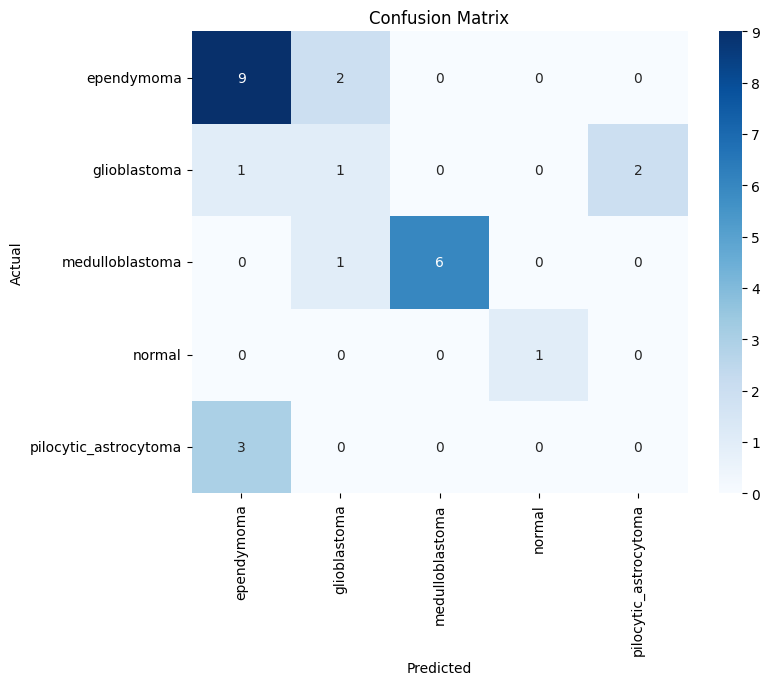

Cross-validation accuracy scores: [0.73076923 0.65384615 0.80769231 0.46153846 0.61538462]
Mean Cross-validation accuracy: 65.38%


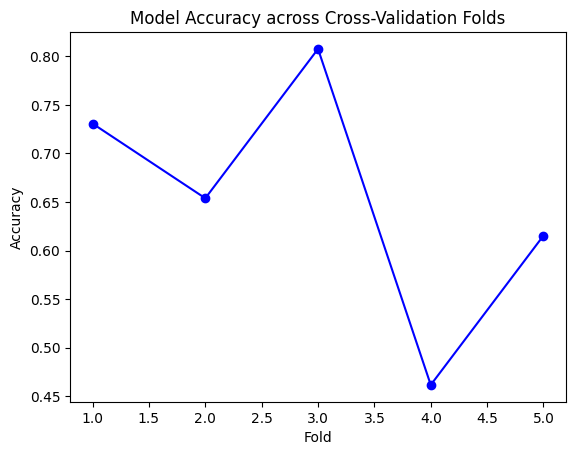

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Step 1: Load the dataset
df = pd.read_csv('/content/Brain_GSE50161.csv')

# Step 2: Data Preprocessing
# Encode the target variable ('type') to numeric
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])  # Encoding 'normal', 'ependymoma', 'glioblastoma'

# Handle missing values using imputation if there are any missing values
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean of the column
df[['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at']] = imputer.fit_transform(
    df[['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at']])

# Step 3: Splitting the data into training and testing sets
X = df[['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at']]  # Feature columns
y = df['type']  # Target column

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling (Important for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build and train the Naïve Bayes model
nb_classifier = GaussianNB()  # Gaussian Naive Bayes classifier for continuous data
nb_classifier.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = nb_classifier.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 7: Confusion Matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 8: Cross-validation for better model evaluation (Optional)
cv_scores = cross_val_score(nb_classifier, X, y, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Step 9: Plotting accuracy during training (Optional)
accuracy_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
plt.plot(range(1, 6), accuracy_scores, marker='o', color='b', label='Accuracy per fold')
plt.title('Model Accuracy across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section